In [48]:
###Correlation between stations.

from viresclient import SwarmRequest
import hapiclient
from hapiclient.util import pythonshell
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from chaosmagpy import load_CHAOS_matfile
from chaosmagpy.model_utils import synth_values
from chaosmagpy.data_utils import mjd2000 # Modified Julian date
import tqdm
from sklearn.cluster import KMeans

import utils

In [49]:
###Step 1: get current directory and set PATH variable to where data will be saved.

import os

# Get the current working directory
current_path = os.getcwd()

# Print the current working directory
print("Current working directory:", current_path)

#define path to data folder where data will be placed. Print current path if you don't know what it is!
PATH = '/mnt/c/users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/data/'

Current working directory: /mnt/c/users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/dBdtCorrelation


In [55]:
###Step 2: Import dataset from csv
observatory='NGK'
obs=pd.read_csv(PATH + observatory +'19982020.csv',index_col='Timestamp')###Observatory Dataset downloaded
obs=obs.to_xarray() #Into xarray

print(obs)

<xarray.Dataset>
Dimensions:    (Timestamp: 11568960)
Coordinates:
  * Timestamp  (Timestamp) object '1998-01-01 00:00:00' ... '2019-12-31 23:59...
Data variables:
    B_N        (Timestamp) float64 -3.773 -4.174 -4.374 ... 15.56 15.66 15.86
    B_E        (Timestamp) float64 27.4 27.39 27.39 ... -24.61 -24.71 -24.92
    B_C        (Timestamp) float64 19.33 19.43 19.53 ... -41.75 -41.85 -41.85
    B_H        (Timestamp) float64 -2.636 -3.036 -3.237 ... 13.59 13.68 13.87
    dBdt       (Timestamp) float64 nan -0.4004 -0.2003 ... 0.09301 0.1854


In [56]:
###Step 2: Import dataset from csv
observatory='LER'
obs=pd.read_csv(PATH + observatory +'19982020.csv',index_col='Timestamp')###Observatory Dataset downloaded
obs=obs.to_xarray() #Into xarray

print(obs)

<xarray.Dataset>
Dimensions:    (Timestamp: 11568960)
Coordinates:
  * Timestamp  (Timestamp) object '1998-01-01 00:00:00' ... '2019-12-31 23:59...
Data variables:
    B_N        (Timestamp) float64 -3.773 -4.174 -4.374 ... 15.56 15.66 15.86
    B_E        (Timestamp) float64 27.4 27.39 27.39 ... -24.61 -24.71 -24.92
    B_C        (Timestamp) float64 19.33 19.43 19.53 ... -41.75 -41.85 -41.85
    B_H        (Timestamp) float64 -2.636 -3.036 -3.237 ... 13.59 13.68 13.87
    dBdt       (Timestamp) float64 nan -0.4004 -0.2003 ... 0.09301 0.1854


# Looping over all observatories and producing .csv file of dBdt.

In [51]:
###Step 3: loop over all data and download dbdt for each one.
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(PATH) if isfile(join(PATH, f))]

In [52]:
allobsdbdt = pd.DataFrame()

allobsdbdt.index = obs['Timestamp']

In [54]:
print(onlyfiles)
for i in tqdm.tqdm(onlyfiles):
    obsiname=i[0:3]
    obsi=pd.read_csv(PATH + i,index_col='Timestamp')###Observatory Dataset downloaded
    #allobsdbdt = allobsdbdt.assign(obsiname=obsi['dBdt'])
    allobsdbdt[obsiname] = obsi['dBdt']
    print(obsi)

['ABG19982020.csv', 'ABK19982020.csv', 'BDV19982020.csv', 'BEL19982020.csv', 'BLC19982020.csv', 'BMT19982020.csv', 'BOU19982020.csv', 'BRW19982020.csv', 'BSL19982020.csv', 'CLF19982020.csv', 'CMO19982020.csv', 'CNB19982020.csv', 'ESK19982020.csv', 'EYR19982020.csv', 'FCC19982020.csv', 'FRD19982020.csv', 'FRN19982020.csv', 'FUR19982020.csv', 'GDH19982020.csv', 'GUA19982020.csv', 'GUI19982020.csv', 'HAD19982020.csv', 'HER19982020.csv', 'HLP19982020.csv', 'HON19982020.csv', 'HRB19982020.csv', 'IQA19982020.csv', 'IRT19982020.csv', 'KAK19982020.csv', 'LER19982020.csv', 'MEA19982020.csv', 'MMB19982020.csv', 'NAQ19982020.csv', 'NCK19982020.csv', 'NEW19982020.csv', 'NGK19982020.csv', 'NUR19982020.csv', 'OTT19982020.csv', 'PHU19982020.csv', 'RES19982020.csv', 'SBA19982020.csv', 'SIT19982020.csv', 'SJG19982020.csv', 'SOD19982020.csv', 'SPT19982020.csv', 'STJ19982020.csv', 'TAM19982020.csv', 'THL19982020.csv', 'THY19982020.csv', 'TUC19982020.csv', 'VIC19982020.csv', 'WNG19982020.csv', 'YKC1998202

  2%|███▎                                                                                                                                                                         | 1/53 [00:20<17:34, 20.28s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -3.773208  27.396174  19.330086  -2.635878       NaN
1998-01-01 00:01:00  -4.173536  27.386102  19.428714  -3.036327 -0.400449
1998-01-01 00:02:00  -4.373865  27.386031  19.527994  -3.236618 -0.200291
1998-01-01 00:03:00  -4.674845  27.375959  19.826947  -3.537738 -0.301121
1998-01-01 00:04:00  -4.474199  27.385888  19.627533  -3.336935  0.200804
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  15.555948 -24.614616 -41.745580  13.589963  0.107148
2019-12-31 23:56:00  15.655632 -24.514715 -41.645363  13.696461  0.106498
2019-12-31 23:57:00  15.555969 -24.614813 -41.745797  13.589970 -0.106491
2019-12-31 23:58:00  15.656305 -24.714911 -41.845580  13.682978  0.093008
2019-12-31 23:59:00  15.856315 -24.915009 -41.845037  13.868343  0.185364

[11568960 rows x 5 columns]


  4%|██████▌                                                                                                                                                                      | 2/53 [00:43<18:47, 22.12s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -3.773208  27.396174  19.330086  -2.635878       NaN
1998-01-01 00:01:00  -4.173536  27.386102  19.428714  -3.036327 -0.400449
1998-01-01 00:02:00  -4.373865  27.386031  19.527994  -3.236618 -0.200291
1998-01-01 00:03:00  -4.674845  27.375959  19.826947  -3.537738 -0.301121
1998-01-01 00:04:00  -4.474199  27.385888  19.627533  -3.336935  0.200804
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  15.555948 -24.614616 -41.745580  13.589963  0.107148
2019-12-31 23:56:00  15.655632 -24.514715 -41.645363  13.696461  0.106498
2019-12-31 23:57:00  15.555969 -24.614813 -41.745797  13.589970 -0.106491
2019-12-31 23:58:00  15.656305 -24.714911 -41.845580  13.682978  0.093008
2019-12-31 23:59:00  15.856315 -24.915009 -41.845037  13.868343  0.185364

[11568960 rows x 5 columns]


  6%|█████████▊                                                                                                                                                                   | 3/53 [01:05<18:13, 21.86s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -3.773208  27.396174  19.330086  -2.635878       NaN
1998-01-01 00:01:00  -4.173536  27.386102  19.428714  -3.036327 -0.400449
1998-01-01 00:02:00  -4.373865  27.386031  19.527994  -3.236618 -0.200291
1998-01-01 00:03:00  -4.674845  27.375959  19.826947  -3.537738 -0.301121
1998-01-01 00:04:00  -4.474199  27.385888  19.627533  -3.336935  0.200804
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  15.555948 -24.614616 -41.745580  13.589963  0.107148
2019-12-31 23:56:00  15.655632 -24.514715 -41.645363  13.696461  0.106498
2019-12-31 23:57:00  15.555969 -24.614813 -41.745797  13.589970 -0.106491
2019-12-31 23:58:00  15.656305 -24.714911 -41.845580  13.682978  0.093008
2019-12-31 23:59:00  15.856315 -24.915009 -41.845037  13.868343  0.185364

[11568960 rows x 5 columns]


  6%|█████████▊                                                                                                                                                                   | 3/53 [01:06<18:26, 22.12s/it]


KeyboardInterrupt: 

In [33]:
###Step 4: save as a csv file.
PATH = '/mnt/c/users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/data_merged/'

###Save to netcdf file
#MAY NOT BE IN CORRECT FORMAT. May require xarray.
#allobsdbdt.to_netcdf(path = PATH+'mergeddatafromobsdata.nc')

###Save to csv file
# Save the DataFrame to a CSV file
allobsdbdt.to_csv(PATH+'mergeddatafromobsdata.csv',index=True)

# Correlation of different stations dBdt values.

In [ ]:
###Require cell here to import from csv exported above.

In [45]:
print(allobsdbdt)

                          ABG       ABK       BDV       BEL       BLC  \
1998-01-01 00:01:00 -0.400449 -0.400449 -0.400449 -0.400449 -0.400449   
1998-01-01 00:02:00 -0.200291 -0.200291 -0.200291 -0.200291 -0.200291   
1998-01-01 00:03:00 -0.301121 -0.301121 -0.301121 -0.301121 -0.301121   
1998-01-01 00:04:00  0.200804  0.200804  0.200804  0.200804  0.200804   
1998-01-01 00:05:00 -0.100553 -0.100553 -0.100553 -0.100553 -0.100553   
...                       ...       ...       ...       ...       ...   
2019-12-31 23:55:00  0.107148  0.107148  0.107148  0.107148  0.107148   
2019-12-31 23:56:00  0.106498  0.106498  0.106498  0.106498  0.106498   
2019-12-31 23:57:00 -0.106491 -0.106491 -0.106491 -0.106491 -0.106491   
2019-12-31 23:58:00  0.093008  0.093008  0.093008  0.093008  0.093008   
2019-12-31 23:59:00  0.185364  0.185364  0.185364  0.185364  0.185364   

                          BMT       BOU       BRW       BSL       CLF  ...  \
1998-01-01 00:01:00 -0.400449 -0.400449 -0.40

In [43]:
# Drop rows with missing values
allobsdbdt.dropna(inplace=True)

# Perform k-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(allobsdbdt)

/home/spiralwidget/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

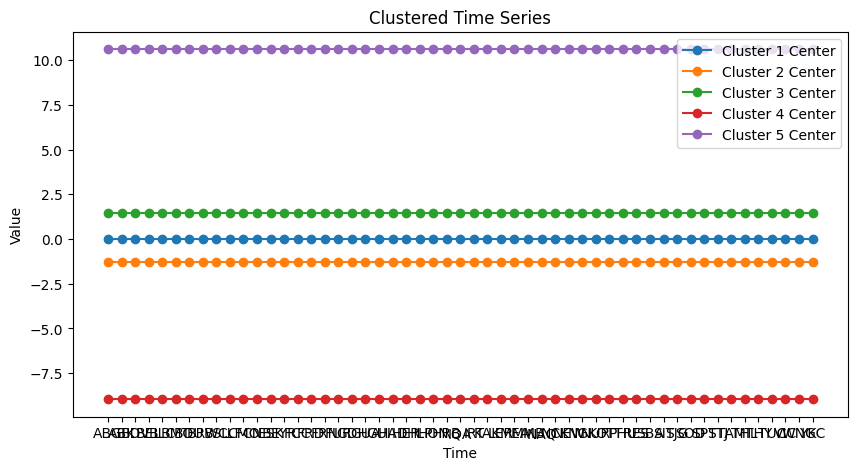

Cluster Labels: [0 0 0 ... 0 0 0]


In [44]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Assign cluster labels to each time series
cluster_labels = kmeans.labels_

# Plot the clustered time series
plt.figure(figsize=(10, 5))
for i in range(k):
     plt.plot(allobsdbdt.columns, cluster_centers[i], label=f'Cluster {i+1} Center', marker='o')
plt.title('Clustered Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display cluster labels
print("Cluster Labels:", cluster_labels)